# Predicting survival chance in Titanic using Machine Learning

This notebook looks into usnig various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone will survive the Titanic sinking ship based on their data attributes.

We're going to take the following approach:

1. Problem defination
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem defination
In a statement,

>In this challenge, we are going to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

## 2. Data

The data has been split into two groups:

The training set should be used to build your machine learning models. 
The test set should be used to see how well your model performs on unseen data.
[**Data**](https://www.kaggle.com/competitions/titanic/data)

## 3. Evaluation

If we reach 95% accuracy at predicting whether or not a person will survive the sinking Titanic, we'll pursue the project.

## 4. Features

This is where we'll get different information about each of the features in your data.

**Data Dictionary**

1. **Survival**	 : 	0 = No, 1 = Yes
2. **Pclass** :   A proxy for socio-economic status (SES)
      * 1st = Upper
      * 2nd = Middle
      * 3rd = Lower
3. **Sex** : Sex	
4. **Age** : Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5	
5. **Sibsp** : The dataset defines family relations in this way...
      * Sibling = brother, sister, stepbrother, stepsister
      * Spouse = husband, wife (mistresses and fiancés were ignored)	
6. **Parch** : The dataset defines family relations in this way...
   * Parent = mother, father
   * Child = daughter, son, stepdaughter, stepson
   * Some children travelled only with a nanny, therefore parch=0 for them.	
7. **Ticket** : Ticket number	
8. **Fare** : Passenger fare	
9. **Cabin** : Cabin number	
10. **Embarked** : Port of Embarkation
       * C = Cherbourg, 
       * Q = Queenstown, 
       * S = Southampton 

In [1]:
# Import all the tools we need

# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# We want our plot to appear inside the notebook
%matplotlib inline

# Import models for our problem
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Import model evaluation tools
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import RocCurveDisplay

# Data Exploratory (Exploratory Data Analysis or EDA)

The goal here is to find more about our data and to become a subjet matter expert ont he dataset we're working.

1. What question are we trying to solve?
2. What kind of data do we have and how do we treat differnt types?
3. What's missing with the data and how do we deal with it?
4. Where are the ouliers and why should you care about them?
5. How can add, change and remove features to get more out of your data

### Load Training Dataset

In [2]:
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape

(891, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Data Cleaning

Drop the columns which are not required for prediction.

In [6]:
df.drop([ "Name" ,"Ticket" , "Fare", "Cabin"], axis=1, inplace=True)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,male,22.0,1,0,S
1,2,1,1,female,38.0,1,0,C
2,3,1,3,female,26.0,0,0,S
3,4,1,1,female,35.0,1,0,S
4,5,0,3,male,35.0,0,0,S


## Filling missing value in Age column 

In [7]:
df["Age"].fillna(df["Age"].median(), inplace=True)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,male,22.0,1,0,S
1,2,1,1,female,38.0,1,0,C
2,3,1,3,female,26.0,0,0,S
3,4,1,1,female,35.0,1,0,S
4,5,0,3,male,35.0,0,0,S


In [8]:
# Again Checking Null values
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Embarked       2
dtype: int64

In [9]:
df.dropna(axis=0, subset=['Embarked'], inplace=True)

## Describe the different columns of data

In [10]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.315152,0.524184,0.382452
std,256.998173,0.486260,0.834700,12.984932,1.103705,0.806761
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000
75%,668.000000,1.000000,3.000000,35.000000,1.000000,0.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000


## No. of People Survived

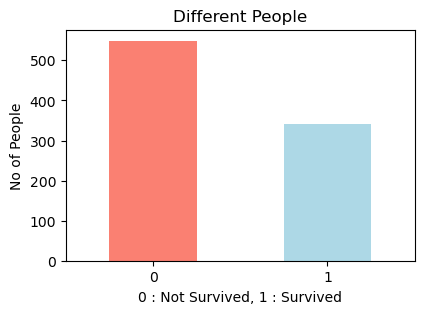

In [11]:
# Plot No. of people survived or not
df["Survived"].value_counts().plot.bar(color = ["salmon", "lightblue"], figsize= (4.5,3))
plt.title("Different People")
plt.xlabel("0 : Not Survived, 1 : Survived")
plt.ylabel("No of People")
plt.xticks(rotation=0);

## People Surviving vs Gender

In [12]:
pd.crosstab(df["Sex"], df["Survived"])

Survived,0,1
Sex,,
female,81,231
male,468,109


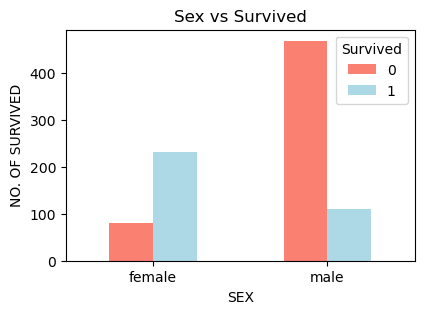

In [13]:
# Plotting crosstab of Sex and Survived columns
pd.crosstab(df["Sex"], df["Survived"]).plot.bar(color = ["salmon", "lightblue"], figsize = (4.5,3))
plt.title("Sex vs Survived")
plt.xlabel("SEX")
plt.ylabel("NO. OF SURVIVED")
plt.xticks(rotation=0);

## Pclass(Ticket Class) vs Survived
**Pclass** :   A proxy for socio-economic status (SES)
   * 1st = Upper
   * 2nd = Middle
   * 3rd = Lower

In [14]:
df["Pclass"].value_counts()

3    491
1    214
2    184
Name: Pclass, dtype: int64

In [15]:
# Crosstab
pd.crosstab(df["Pclass"], df["Survived"])

Survived,0,1
Pclass,,
1,80,134
2,97,87
3,372,119


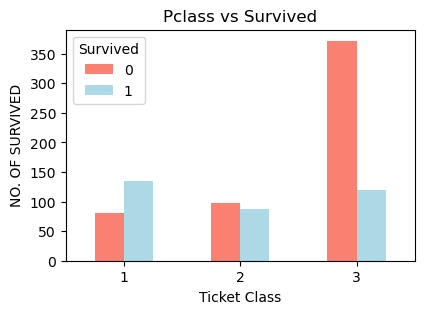

In [16]:
# PLot crosstab of Pclass and survived columns
pd.crosstab(df["Pclass"], df["Survived"]).plot.bar(color = ["salmon", "lightblue"], figsize = (4.5,3))
plt.title("Pclass vs Survived")
plt.xlabel("Ticket Class")
plt.ylabel("NO. OF SURVIVED")
plt.xticks(rotation=0);

## Parch vs Survived
**Parch** : The dataset defines family relations in this way...
   * Parent = mother, father
   * Child = daughter, son, stepdaughter, stepson
   * Some children travelled only with a nanny, therefore parch=0 for them.	

In [17]:
df["Parch"].value_counts()

0    676
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [18]:
# Crosstab of Parch and Survived columns
pd.crosstab(df["Parch"], df["Survived"])

Survived,0,1
Parch,,
0,445,231
1,53,65
2,40,40
3,2,3
4,4,0
5,4,1
6,1,0


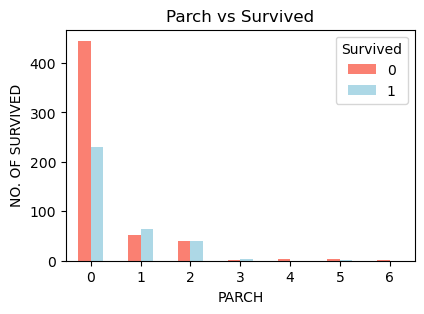

In [19]:
# Plot Crosstab of Parch and Survived columns
pd.crosstab(df["Parch"], df["Survived"]).plot.bar(color = ["salmon", "lightblue"], figsize = (4.5,3))
plt.title("Parch vs Survived")
plt.xlabel("PARCH")
plt.ylabel("NO. OF SURVIVED")
plt.xticks(rotation=0);

In [20]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,male,22.0,1,0,S
1,2,1,1,female,38.0,1,0,C
2,3,1,3,female,26.0,0,0,S
3,4,1,1,female,35.0,1,0,S
4,5,0,3,male,35.0,0,0,S


## SibSp vs Survived

**Sibsp** : The dataset defines family relations in this way...
   * Sibling = brother, sister, stepbrother, stepsister
   * Spouse = husband, wife (mistresses and fiancés were ignored)

In [21]:
df["SibSp"].value_counts()

0    606
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [22]:
# Crosstab of SibSp and Survived columns
pd.crosstab(df["SibSp"], df["Survived"])

Survived,0,1
SibSp,,
0,398,208
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


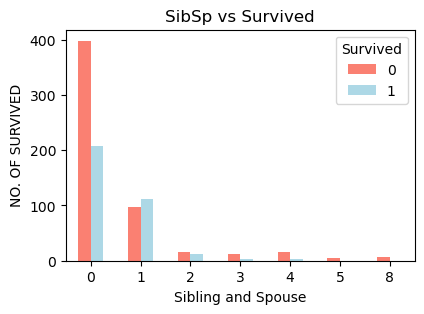

In [23]:
# Plot Crosstab of SibSp and Survived columns
pd.crosstab(df["SibSp"], df["Survived"]).plot.bar(color = ["salmon", "lightblue"], figsize = (4.5,3))
plt.title("SibSp vs Survived")
plt.xlabel("Sibling and Spouse")
plt.ylabel("NO. OF SURVIVED")
plt.xticks(rotation=0);

## Embarked vs Survived

**Embarked** : Port of Embarkation
   * C = Cherbourg, 
   * Q = Queenstown, 
   * S = Southampton 

In [24]:
df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [25]:
# Crosstab of Embarked and Survived columns
pd.crosstab(df["Embarked"], df["Survived"])

Survived,0,1
Embarked,,
C,75,93
Q,47,30
S,427,217


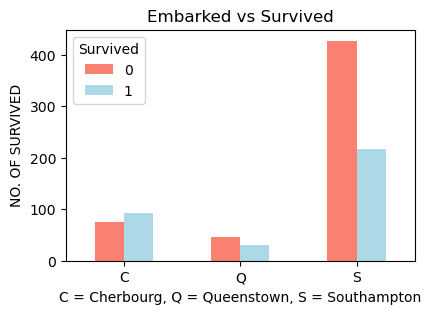

In [26]:
# Plot Crosstab of SibSp and Survived columns
pd.crosstab(df["Embarked"], df["Survived"]).plot.bar(color = ["salmon", "lightblue"], figsize = (4.5,3))
plt.title("Embarked vs Survived")
plt.xlabel("C = Cherbourg, Q = Queenstown, S = Southampton")
plt.ylabel("NO. OF SURVIVED")
plt.xticks(rotation=0);

## Embarked vs Pclass

**Embarked** : Port of Embarkation
   * C = Cherbourg, 
   * Q = Queenstown, 
   * S = Southampton 
   
**Pclass** :   A proxy for socio-economic status (SES)
   * 1st = Upper
   * 2nd = Middle
   * 3rd = Lower

In [27]:
# Crosstab of Embarked and Pclass columns
pd.crosstab(df["Embarked"], df["Pclass"])

Pclass,1,2,3
Embarked,,,
C,85,17,66
Q,2,3,72
S,127,164,353


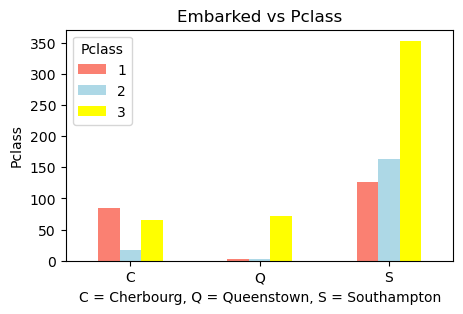

In [28]:
# PLot Crosstab of Embarked and Pclass columns
pd.crosstab(df["Embarked"], df["Pclass"]).plot.bar(color = ["salmon", "lightblue", "yellow"], 
                                                   figsize = (5,3))
plt.title("Embarked vs Pclass")
plt.xlabel("C = Cherbourg, Q = Queenstown, S = Southampton")
plt.ylabel("Pclass")
plt.xticks(rotation=0);

## Now we see Correlation Matrix of our DataFrame

In [29]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch
PassengerId,1.000000,-0.005028,-0.035330,0.031319,-0.057686,-0.001657
Survived,-0.005028,1.000000,-0.335549,-0.069822,-0.034040,0.083151
Pclass,-0.035330,-0.335549,1.000000,-0.336512,0.081656,0.016824
Age,0.031319,-0.069822,-0.336512,1.000000,-0.232543,-0.171485
SibSp,-0.057686,-0.034040,0.081656,-0.232543,1.000000,0.414542
Parch,-0.001657,0.083151,0.016824,-0.171485,0.414542,1.000000


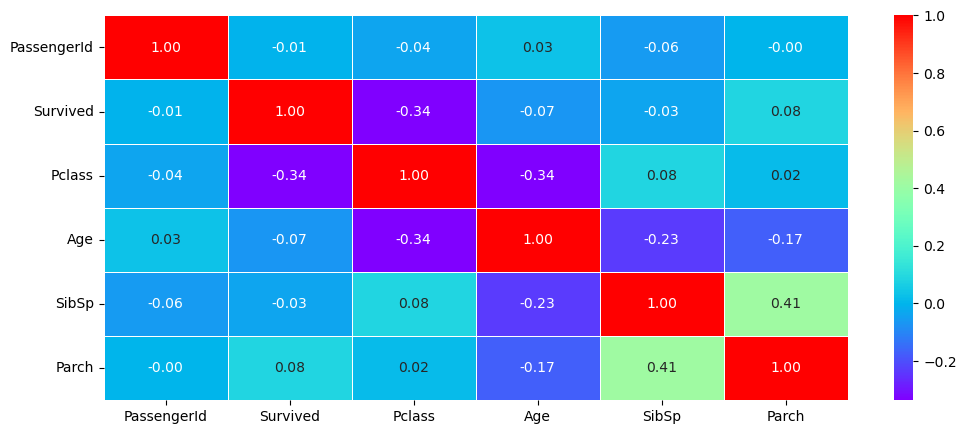

In [30]:
# Create visual Correation Matrix of our DataFrame
corr_df = df.corr()
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.heatmap(corr_df, annot=True,
                 cmap="rainbow",
                 fmt='.2f',
                 linewidths=0.5)

## Converting Catogarical columns into numeric columns

In [31]:
df["Sex"].replace(["male","female"],[0,1], inplace=True)
df["Embarked"].replace(["C","Q","S"],[0,1,2], inplace=True)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,0,22.0,1,0,2
1,2,1,1,1,38.0,1,0,0
2,3,1,3,1,26.0,0,0,2
3,4,1,1,1,35.0,1,0,2
4,5,0,3,0,35.0,0,0,2


# Modeling

In [32]:
# Splitting data into x and y label
x = df.drop(columns=["Survived", "PassengerId"], axis=1)
y = df["Survived"]

In [33]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2) 

Now we've got our data split into features and labels, it's time to build a machine learning model

We'll train it(find the pattern) on the traning set.

And we'll test it(use the pattern) on the test set.

we're going to try diffrent machine learning model

1. LogisticRegression
2. KNeighborsClassifier
3. RandomForestClassifier
4. Linear SVC
5. SVC

In [34]:
# we will create a dictionary fro models
models = {"LogisticRegression" : LogisticRegression(),  
            "KNeighborsClassifier" : KNeighborsClassifier(),  
            "RandomForestClassifier" : RandomForestClassifier(),
            "Linear SVC" : LinearSVC(),
            "SVC" : SVC()
            }

# Now we will Create a function
def fit_and_score(model,X_train, X_test, y_train, y_test):
    """
    Fit and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data(no lables)
    X_test : testing data(no lables)
    y_train : tranning lables
    y_test : testing lables
    """
    # Set Random seed
    np.random.seed(42)
    
    # Empty Dict 
    models_score = {}
    
    for name,model in models.items():
        model.fit(X_train, y_train)
        models_score[name] = model.score(X_test, y_test)
        
        
    return models_score

In [35]:
model_scores = fit_and_score(model = models, 
                             X_train = X_train, 
                             X_test = X_test, 
                             y_train = y_train, 
                             y_test = y_test)
model_scores

C:\Users\krman\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


{'LogisticRegression': 0.8202247191011236,
 'KNeighborsClassifier': 0.7865168539325843,
 'RandomForestClassifier': 0.7865168539325843,
 'Linear SVC': 0.8202247191011236,
 'SVC': 0.6348314606741573}

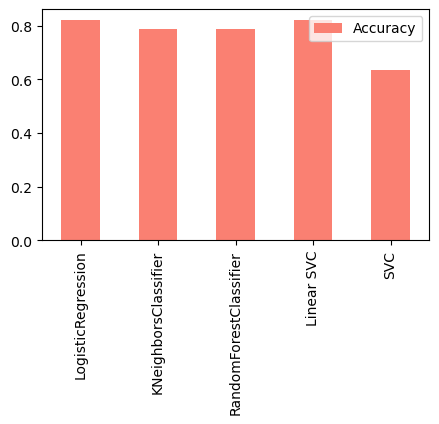

In [36]:
# Create more visual model_scores
model_score_df = pd.DataFrame(model_scores, index = ["Accuracy"])
model_score_df.T.plot.bar(color = "salmon", figsize = (5,3));

Now we've got a baseline model and we can see that model's first prediction aren't that good.

So we can look for the following:
* Hyperparameters tunning
* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification
* ROC curve
* Area Under Curve (AUC)

# Hyperparameter tuning with RandomizedSearchCV

we're going to tune:
* LogisticRegression()
* RandomForestClassifier()

...Using RandomizedSearchCV

In [37]:
# Create a hyperparameter grid for LogisticRegression and RandomForestClassifer
log_reg_grid = {"C" : np.logspace(-4, 4, 50),
                "solver" : ["liblinear"]}

rf_grid = {"n_estimators" : np.arange(10, 1000, 50),
           "max_depth" : [None, 3, 5, 10],
           "min_samples_split" : np.arange(2, 20, 2),
           "min_samples_leaf" : np.arange(1, 20, 2)}

Now we've got hyperparameter grids setup for each of our models, let's tune them using RandomizedSearchCV...

In [38]:
# Let's Tune Logistic Regression Model

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=50,
                                verbose=True)

# # Fit Random hyperparameter serach model for Logistic Regression
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=50,
                   param_distributions={'C': array([1.00000000e-04, 1.45634848e-04, 2.12095089e-04, 3.08884360e-04,
       4.49843267e-04, 6.55128557e-04, 9.54095476e-04, 1.38949549e-03,
       2.02358965e-03, 2.94705170e-03, 4.29193426e-03, 6.25055193e-03,
       9.10298178e-03, 1.32571137e-02, 1.93069773e-02, 2.81176870e-02,
       4.09491506e-0...
       3.72759372e+00, 5.42867544e+00, 7.90604321e+00, 1.15139540e+01,
       1.67683294e+01, 2.44205309e+01, 3.55648031e+01, 5.17947468e+01,
       7.54312006e+01, 1.09854114e+02, 1.59985872e+02, 2.32995181e+02,
       3.39322177e+02, 4.94171336e+02, 7.19685673e+02, 1.04811313e+03,
       1.52641797e+03, 2.22299648e+03, 3.23745754e+03, 4.71486636e+03,
       6.86648845e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [39]:
# Checking best params
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 16.768329368110066}

In [40]:
# Evaluate the Randomized search Logistic Regression model
rs_log_reg.score(X_test,y_test)

0.8146067415730337

In [41]:
# Let's Tune RandomForest Classifier Model

rs_rfc = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv = 5,
                           n_iter=50,
                           verbose=True)

# Fit Random hyperparameter serach model for RandomForest Classifier
rs_rfc.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=50,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [42]:
# Check Best params
rs_rfc.best_params_

{'n_estimators': 960,
 'min_samples_split': 16,
 'min_samples_leaf': 1,
 'max_depth': 3}

In [43]:
# Evaluate the Randomized search RandomForestClassifier model
rs_rfc.score(X_test, y_test)

0.848314606741573

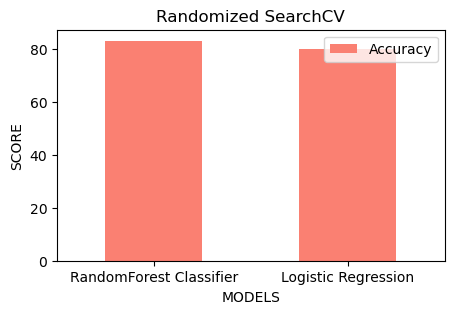

In [44]:
# Create visual of Randomized search RandomForestClassifier and Logistic regression
rs_df = pd.DataFrame({"RandomForest Classifier" : 83,
                      "Logistic Regression" : 80}, 
                     index=["Accuracy"])

rs_df.T.plot.bar(color=("salmon"),figsize = (5,3))
plt.title("Randomized SearchCV")
plt.xlabel("MODELS")
plt.ylabel("SCORE")
plt.xticks(rotation=0);

# Hyperparameter tuning with GridSearchCV

Since our RandomForestClassifier model provides the best scores so far, we'll try and improve them again usnig GrideSearchCV...  

In [45]:
# Let's Tune Logistic Regression Model
log_reg_grid = {"C" : np.logspace(-4, 4, 50),
                "solver" : ["liblinear"]}


gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid = log_reg_grid,
                          cv = 5,
                          verbose = True)

gs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.45634848e-04, 2.12095089e-04, 3.08884360e-04,
       4.49843267e-04, 6.55128557e-04, 9.54095476e-04, 1.38949549e-03,
       2.02358965e-03, 2.94705170e-03, 4.29193426e-03, 6.25055193e-03,
       9.10298178e-03, 1.32571137e-02, 1.93069773e-02, 2.81176870e-02,
       4.09491506e-02, 5.96362332e-02, 8.685113...
       3.72759372e+00, 5.42867544e+00, 7.90604321e+00, 1.15139540e+01,
       1.67683294e+01, 2.44205309e+01, 3.55648031e+01, 5.17947468e+01,
       7.54312006e+01, 1.09854114e+02, 1.59985872e+02, 2.32995181e+02,
       3.39322177e+02, 4.94171336e+02, 7.19685673e+02, 1.04811313e+03,
       1.52641797e+03, 2.22299648e+03, 3.23745754e+03, 4.71486636e+03,
       6.86648845e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [46]:
# Checking best params
gs_log_reg.best_params_

{'C': 16.768329368110066, 'solver': 'liblinear'}

In [47]:
# Evaluate the Grid search Logistic Regression model
gs_log_reg.score(X_test,y_test)

0.8146067415730337

In [48]:
# Let's Tune RandomForest Classifier Model
rf_grid = {"n_estimators" : np.arange(10, 200, 50),
           "max_depth" : [None, 3, 5, 10],
           "min_samples_split" : np.arange(2, 20, 2),
           "min_samples_leaf" : np.arange(1, 20, 2)}

# rf_grid = {"n_estimators" : [10],
#            "max_depth" : [5],
#            "min_samples_split" : [2],
#            "min_samples_leaf" :[1]}

gs_rfc = GridSearchCV(RandomForestClassifier(),
                      param_grid = rf_grid,
                      cv = 5,
                      verbose = True)

gs_rfc.fit(X_train, y_train)

Fitting 5 folds for each of 1440 candidates, totalling 7200 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 3, 5, 10],
                         'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                         'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                         'n_estimators': array([ 10,  60, 110, 160])},
             verbose=True)

In [49]:
# Checking best params
gs_rfc.best_params_

{'max_depth': 5,
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'n_estimators': 60}

In [50]:
# Evaluate the Randomized search RandomForestClassifier model
gs_rfc.score(X_test, y_test)

0.848314606741573

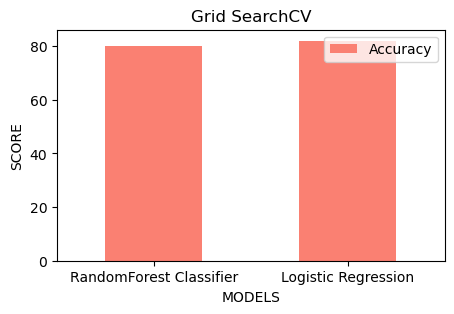

In [51]:
# Create visual of Grid search RandomForestClassifier and Logistic regression
rs_df = pd.DataFrame({"RandomForest Classifier" : 80,
                      "Logistic Regression" : 82}, 
                     index=["Accuracy"])

rs_df.T.plot.bar(color=("salmon"),figsize = (5,3))
plt.title("Grid SearchCV")
plt.xlabel("MODELS")
plt.ylabel("SCORE")
plt.xticks(rotation=0);

## Evaluating our tuned Machine Learning Classifier, beyond accuracy

* ROC Curve and AUC score
* Confusion Matrix
* Classification Report
* Precision
* Recall
* F1-Score

.....and it would be great if cross-validation was used where possible.

To make comparisons and evaluate our trained model, first we need to make predictions.

In [52]:
# Make prediction on training Data set
y_preds = gs_rfc.predict(X_test)
y_preds

array([1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0], dtype=int64)

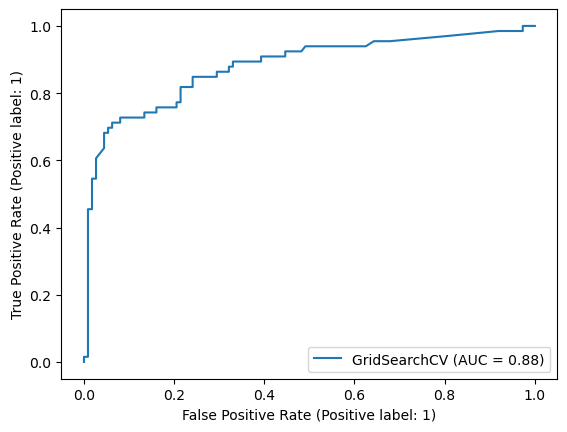

In [53]:
# Plot ROC Curve and Calculate AUC
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(gs_rfc, X_test, y_test);

In [54]:
# Confusuion Matrix
confusion_matrix(y_test,y_preds)

array([[103,   9],
       [ 18,  48]], dtype=int64)

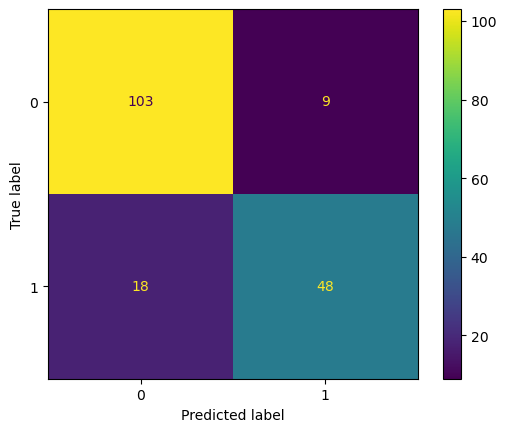

In [55]:
# Create visual Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test,y_preds);

Now we've got a ROC curve, an AUC metric and a confusuion matrix, let's get a classification report
as well as cross-validated precision, recall and f1-score.

In [56]:
# Classification Report
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88       112
           1       0.84      0.73      0.78        66

    accuracy                           0.85       178
   macro avg       0.85      0.82      0.83       178
weighted avg       0.85      0.85      0.85       178



## Calculate evaluation metrics using cross-validation
We're going to calculate accuracy, precision, recall and f1-score of our model using cross-validation and to do so we'll be using [`cross_val_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)

In [57]:
# Check best hyperparameters
gs_rfc.best_params_

{'max_depth': 5,
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'n_estimators': 60}

In [58]:
# Create a new classifier with best parameters
clf = RandomForestClassifier(n_estimators = 60,
                             min_samples_leaf = 5,
                             min_samples_split = 10,
                             max_depth = 10)

In [59]:
# Cross-validated accuracy
cvv_acc = cross_val_score(clf, x, y, scoring="accuracy")
cvv_acc = cvv_acc.mean()
cvv_acc

0.8200596711737447

In [60]:
# Cross-validated precision
cvv_precision = cross_val_score(clf, x, y, scoring="precision")
cvv_precision = cvv_precision.mean()
cvv_precision

0.8414970174539631

In [61]:
# Cross-validated recall
cvv_recall = cross_val_score(clf, x, y, scoring="recall")
cvv_recall = cvv_recall.mean()
cvv_recall

0.6705882352941177

In [62]:
# Cross-validated f1-score
cvv_f1 = cross_val_score(clf, x, y, scoring="f1")
cvv_f1 = cvv_f1.mean()
cvv_f1

0.7386750258993319

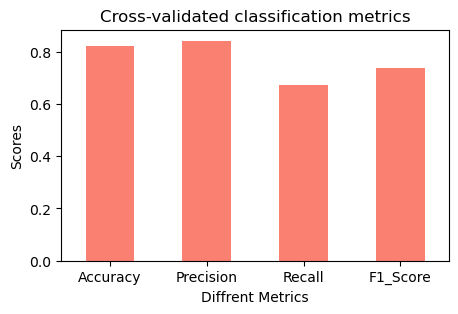

In [63]:
# Create visualization of accuracy, precision, recall, f1-score
metrics_df = pd.DataFrame({"Accuracy" : cvv_acc,
                           "Precision" : cvv_precision,
                           "Recall" : cvv_recall,
                           "F1_Score" : cvv_f1
                          }, index=[0])

metrics_df.T.plot.bar(color = "salmon", legend = False, figsize = (5,3))
plt.title("Cross-validated classification metrics")
plt.xlabel("Diffrent Metrics")
plt.ylabel("Scores")
plt.xticks(rotation=0);

# Now we will Import Test data and try to predict our models on that. 

### Load Test Data

In [64]:
test_df = pd.read_csv("test.csv")

In [65]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [66]:
test_df.shape

(418, 11)

In [67]:
# Geet the info about our data
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [68]:
# Total no. of null values
test_df.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [69]:
# Drop Column which are not required
test_df.drop(["Name" ,"Ticket" , "Fare", "Cabin"], axis=1, inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked
0,892,3,male,34.5,0,0,Q
1,893,3,female,47.0,1,0,S
2,894,2,male,62.0,0,0,Q
3,895,3,male,27.0,0,0,S
4,896,3,female,22.0,1,1,S


In [70]:
# Fill Age column with the median
test_df["Age"].fillna(test_df["Age"].median(), inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked
0,892,3,male,34.5,0,0,Q
1,893,3,female,47.0,1,0,S
2,894,2,male,62.0,0,0,Q
3,895,3,male,27.0,0,0,S
4,896,3,female,22.0,1,1,S


## Convert Catogorical Columns into Numerical Columns


In [71]:
test_df["Sex"].replace(["male","female"],[0,1], inplace=True)
test_df["Embarked"].replace(["C","Q","S"],[0,1,2], inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked
0,892,3,0,34.5,0,0,1
1,893,3,1,47.0,1,0,2
2,894,2,0,62.0,0,0,1
3,895,3,0,27.0,0,0,2
4,896,3,1,22.0,1,1,2


In [72]:
X_test = test_df.drop("PassengerId", axis=1)

In [85]:
# Make prediction on training Data set
final_preds = rs_rfc.predict(X_test)
final_preds

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [86]:
output = pd.DataFrame({'PassengerId': test_df.PassengerId, 'Survived': final_preds})
output.to_csv('Final_submission5.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
